In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('/content/drive/MyDrive/RTA Dataset.csv')
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [3]:
df.shape

(12316, 32)

In [36]:
df_cause=df['Cause_of_accident'].unique()
print(df_cause)

[ 9 16  0  1 14 13 12 11 10  7  8 15  3  2  4 19 17 18  5  6]


In [4]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [5]:
df.isnull().sum ()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [6]:
df.duplicated().sum()

0

In [35]:
df_caused=df['Road_surface_conditions'].unique()
print(df_caused)

[0 3 2 1]


In [7]:
df['Time']= pd.to_datetime(df['Time'])

<ipython-input-7-9d8a133adb20>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']= pd.to_datetime(df['Time'])


In [8]:
df.describe(include="all")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,NaN,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,NaN,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,NaN,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,2024-09-14 14:17:50.768106496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2024-09-14 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2024-09-14 10:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2024-09-14 15:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2024-09-14 18:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024-09-14 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.groupby('Accident_severity').size()

,0
Accident_severity,
Fatal injury,158
Serious Injury,1743
Slight Injury,10415


In [10]:
df['Number_of_casualties'].value_counts()

,count
Number_of_casualties,
1,8397
2,2290
3,909
4,394
5,207
6,89
7,22
8,8


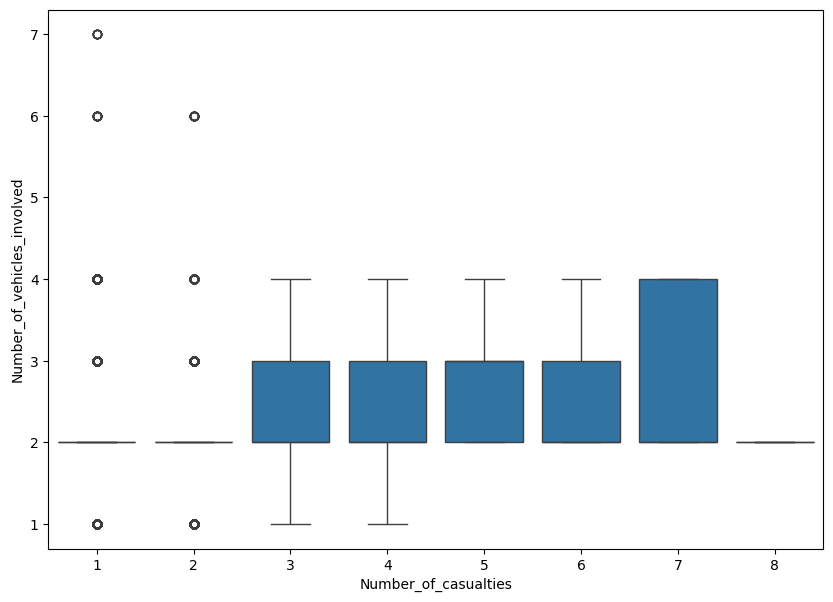

In [11]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y='Number_of_vehicles_involved', x='Number_of_casualties')
plt.show()

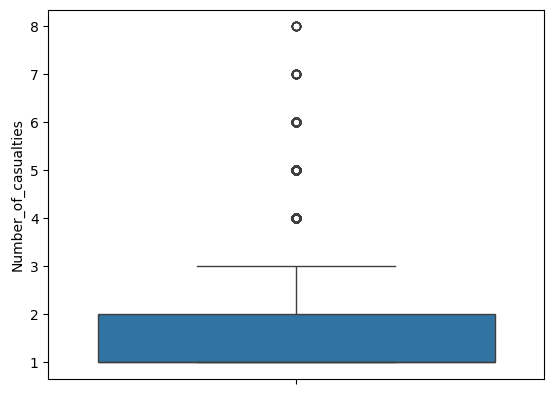

In [15]:
sns.boxplot(data=df, y='Number_of_casualties')
plt.show()

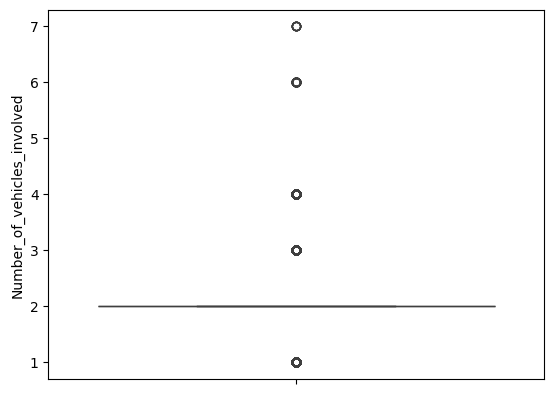

In [13]:
sns.boxplot(data=df, y='Number_of_vehicles_involved')
plt.show()

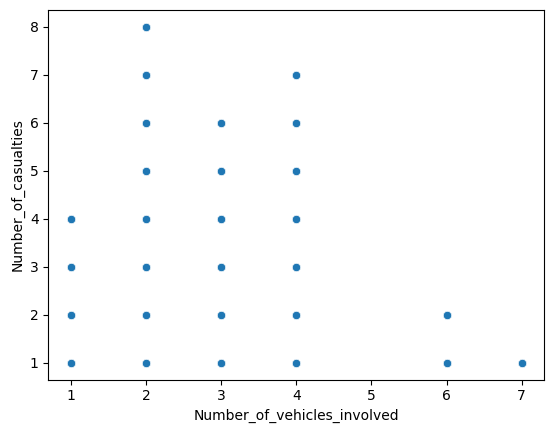

In [16]:
sns.scatterplot(x=df['Number_of_vehicles_involved'], y=df['Number_of_casualties'])
plt.show()

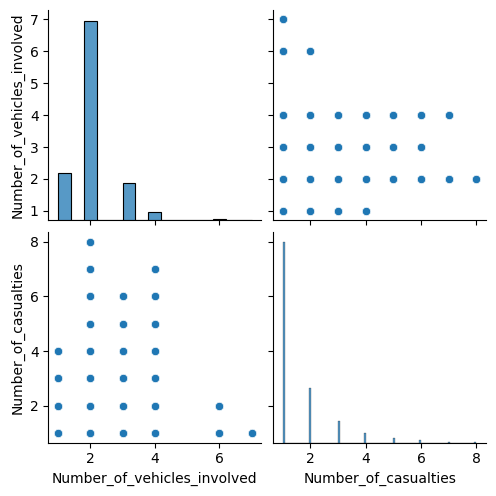

In [17]:
sns.pairplot(df[['Number_of_vehicles_involved','Number_of_casualties']])
plt.show()

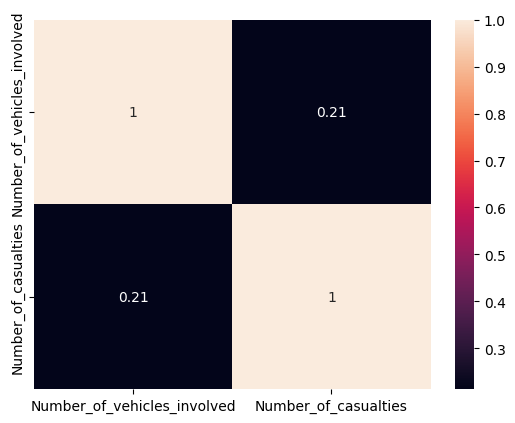

In [18]:
correlation_matrix = df[['Number_of_vehicles_involved','Number_of_casualties']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

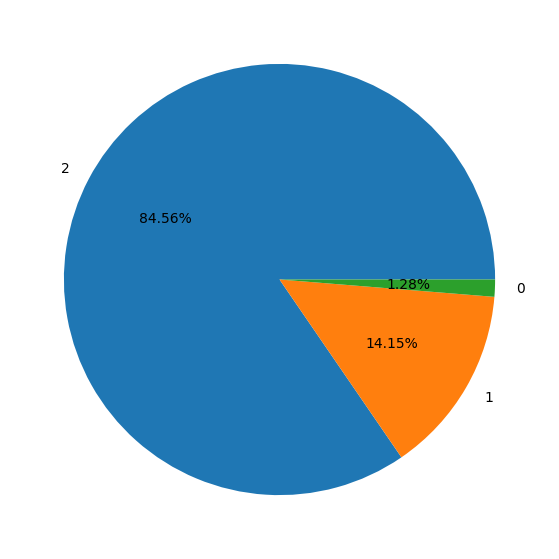

In [29]:
plt.figure(figsize=(10,7))
plt.pie(x=df['Accident_severity'].value_counts().values,
        labels=df['Accident_severity'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

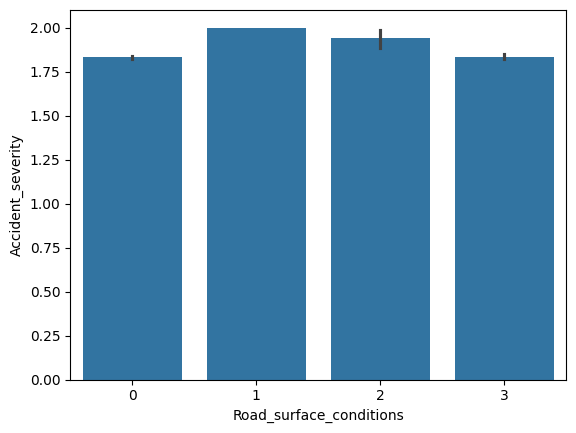

In [38]:
sns.barplot(x=df['Road_surface_conditions'], y=df['Accident_severity'])
plt.show()

In [20]:
lists=['Vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality','Day_of_week','Casualty_severity','Time','Sex_of_driver','Educational_level','Defect_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle', 'Road_surface_type','Sex_of_casualty']
df.drop(columns = lists, inplace=True)

In [21]:
df.shape

(12316, 19)

In [22]:
df.columns

Index(['Age_band_of_driver', 'Driving_experience', 'Type_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Age_band_of_casualty',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [23]:
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0], inplace=True)
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)
df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0], inplace=True)
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0], inplace=True)
df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0], inplace=True)
df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0], inplace=True)
df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0], inplace=True)
df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0], inplace=True)

In [24]:
df.isnull().sum()

,0
Age_band_of_driver,0
Driving_experience,0
Type_of_vehicle,0
Area_accident_occured,0
Lanes_or_Medians,0
Road_allignment,0
Types_of_Junction,0
Road_surface_conditions,0
Light_conditions,0
Weather_conditions,0


In [25]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df=df.apply(LE.fit_transform)

In [26]:
df.corr()

,Age_band_of_driver,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Age_band_of_casualty,Pedestrian_movement,Cause_of_accident,Accident_severity
Age_band_of_driver,1.000000,-0.013407,0.004830,0.011472,0.008176,0.000486,-0.028025,-0.032533,-0.007766,0.025482,0.000496,0.001690,-0.054474,-0.006562,0.005386,0.000043,0.000372,-0.000703,0.013185
Driving_experience,-0.013407,1.000000,0.014333,-0.000290,-0.010444,-0.015602,0.009245,-0.003696,-0.015577,-0.000084,0.012574,-0.008222,-0.007118,0.004794,-0.002783,-0.010891,-0.018790,-0.007728,0.000509
Type_of_vehicle,0.004830,0.014333,1.000000,-0.007631,-0.020156,-0.020910,-0.005553,0.019018,-0.003739,0.006903,0.025911,0.001140,0.003022,0.010841,-0.006116,-0.008934,0.010500,-0.004200,-0.003709
Area_accident_occured,0.011472,-0.000290,-0.007631,1.000000,0.022760,-0.025859,0.014580,-0.007290,-0.013597,0.003127,-0.003940,-0.016498,-0.004690,0.004691,0.011325,0.008001,0.000949,-0.009589,-0.018374
Lanes_or_Medians,0.008176,-0.010444,-0.020156,0.022760,1.000000,0.042815,-0.002125,0.011774,0.004624,0.005828,0.007008,-0.001199,0.002188,-0.002089,0.006034,0.006677,0.005848,0.016384,-0.011844
Road_allignment,0.000486,-0.015602,-0.020910,-0.025859,0.042815,1.000000,0.007188,-0.000918,0.005625,0.018304,0.020418,-0.001536,-0.011434,-0.004267,-0.003117,0.005540,0.005219,-0.000287,-0.005967
Types_of_Junction,-0.028025,0.009245,-0.005553,0.014580,-0.002125,0.007188,1.000000,0.004724,0.037063,-0.001816,0.007516,-0.020214,-0.043389,-0.010761,0.002423,0.007946,-0.008855,-0.006561,-0.008861
Road_surface_conditions,-0.032533,-0.003696,0.019018,-0.007290,0.011774,-0.000918,0.004724,1.000000,-0.198447,0.400485,0.000456,-0.020963,0.072828,-0.004667,-0.002313,0.006415,0.006157,0.002811,0.004579
Light_conditions,-0.007766,-0.015577,-0.003739,-0.013597,0.004624,0.005625,0.037063,-0.198447,1.000000,-0.067367,0.014883,0.032493,-0.055116,0.022327,-0.012499,-0.011780,0.014229,0.004213,0.025741
Weather_conditions,0.025482,-0.000084,0.006903,0.003127,0.005828,0.018304,-0.001816,0.400485,-0.067367,1.000000,-0.013347,-0.037733,0.014138,0.007648,0.003313,-0.002245,0.018292,0.001320,0.010172


<Axes: >

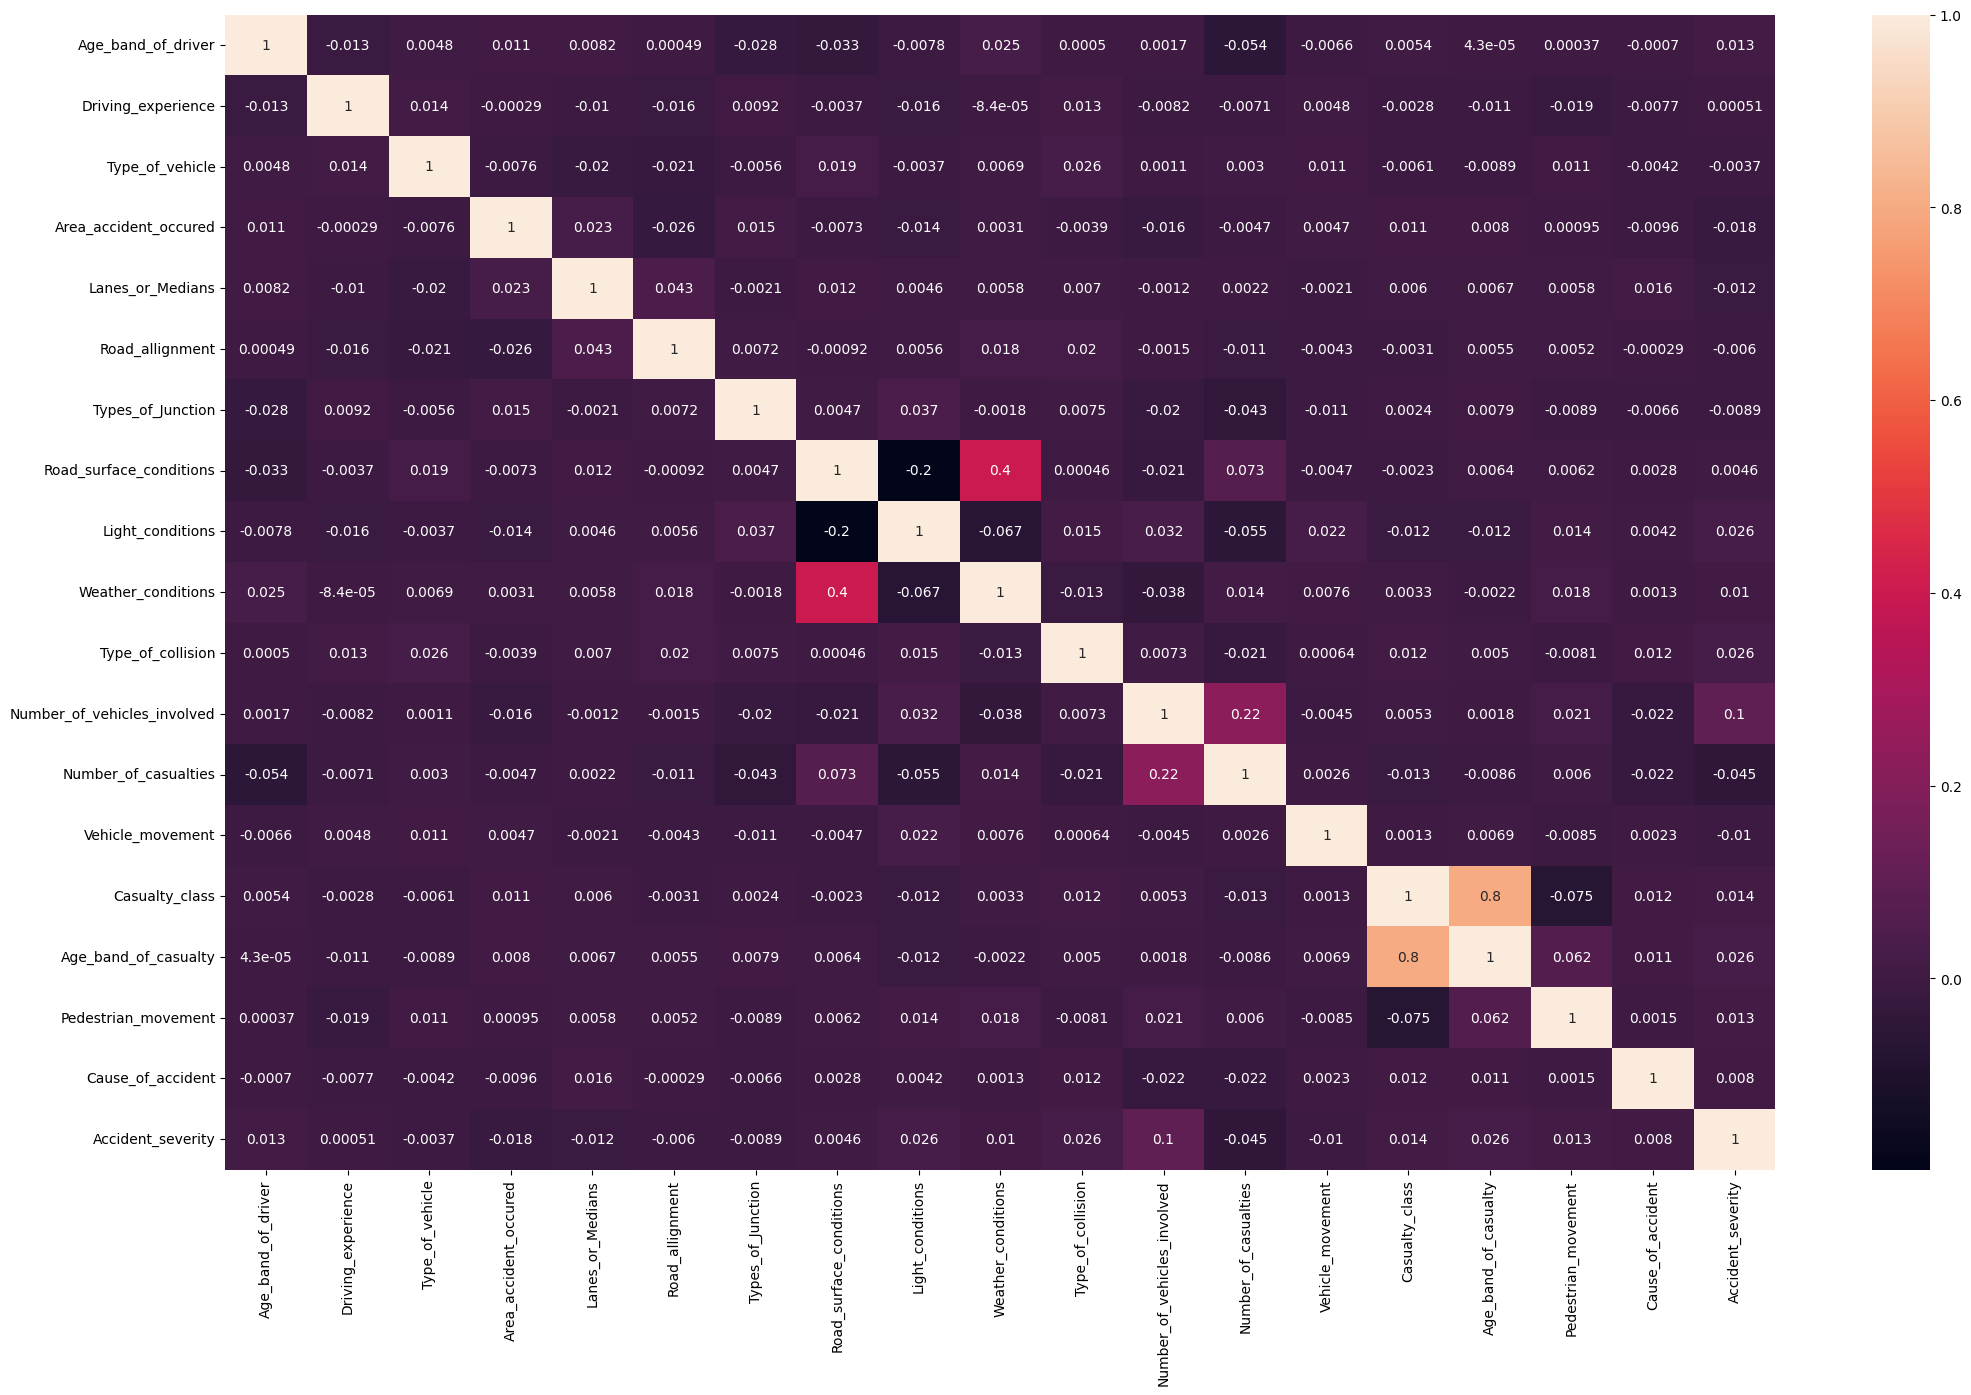

In [27]:
plt.figure(figsize=[25,15])
sns.heatmap(df.corr(),annot=True)